In [1]:
import pandas as pd

df=pd.read_csv('D:/ML/Amazon Mobile Phones Reviews Analysis/Dataset/cell_phone_review.csv')

In [2]:
df=df[:5000]

In [3]:
df

,overall,vote,reviewTime,reviewText,summary
0,2,0,10-02-2010,Tech support is the worst,1265760000
1,2,0,24-10-2016,Screws were missing from the bracket and beaut...,Spend a little more and get much better.
2,1,0,10-07-2017,Trouble connecting and staying connected via b...,1499644800
3,4,5,02-05-2013,I purchased this unit for our RV to replace an...,Receiver Offers a Lot of Flexibility & Complexity
4,3,0,04-01-2013,It works. Nuff said but the review requires 1...,It's a cable
...,...,...,...,...,...
184,4,0,03-12-2013,A great lens for the money.,1386028800
185,5,0,23-01-2015,Five Stars,1421971200
186,1,0,21-12-2017,Fast and great when it works...,1513814400
187,5,0,04-11-2015,XLNT!,XLNT!


In [4]:

import numpy as np

from sklearn.metrics import accuracy_score
import sklearn

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression


from sklearn import tree


import pickle
from sklearn.pipeline import Pipeline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle
import os
import string
import warnings
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm


warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk import tokenize,WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet


In [5]:
df[['review','sentiment']]=df[['reviewText','overall']]

df=df[['review', 'sentiment']]

df['sentiment']=df['sentiment'].replace([1,2,3,4,5],[0,0,0,1,1])


In [6]:
df

,review,sentiment
0,Tech support is the worst,0
1,Screws were missing from the bracket and beaut...,0
2,Trouble connecting and staying connected via b...,0
3,I purchased this unit for our RV to replace an...,1
4,It works. Nuff said but the review requires 1...,0
...,...,...
184,A great lens for the money.,1
185,Five Stars,1
186,Fast and great when it works...,0
187,XLNT!,1


In [7]:
df.sentiment.unique()

array([0, 1], dtype=int64)

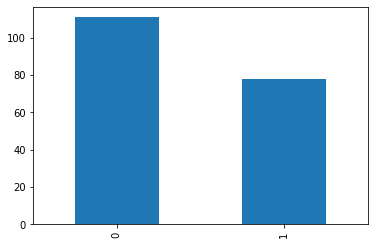

In [8]:

df['sentiment'].value_counts().plot(kind='bar');

In [9]:

df=df.dropna()


In [10]:
df.shape


(189, 2)

In [11]:

stopwords1 = list(stopwords.words('english'))+list(punctuation) 

ps=PorterStemmer()
lemmatizer = WordNetLemmatizer()


def nltk_tag_to_wordnet_tag(nltk_tag):
   
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:         
        return None


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Raman/nltk_data'
    - 'C:\\Users\\Raman\\AppData\\Local\\Programs\\Python\\Python39\\nltk_data'
    - 'C:\\Users\\Raman\\AppData\\Local\\Programs\\Python\\Python39\\share\\nltk_data'
    - 'C:\\Users\\Raman\\AppData\\Local\\Programs\\Python\\Python39\\lib\\nltk_data'
    - 'C:\\Users\\Raman\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:

def lemmatize_sentence(sentence):  
   
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence)) 
   
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)

   
    lemmatized_sentence = []      
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
       
        else:       
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

   
    return " ".join(lemmatized_sentence)

print(lemmatize_sentence(" i have been working on my skills "))


In [ ]:
df['review'][1]

In [ ]:

print(lemmatize_sentence(df['review'][1]))

In [ ]:
def clean_text(a):
    return  ' '.join([i.lower() for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
 
   
    if len(ls)>2:
        val= ' '.join(ls)
        return val
    else :
        return None

   

In [ ]:
def clean_text_lemma(a):
    val= ' '.join([lemmatizer.lemmatize(i.lower(),pos = 'v') for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
    return val



def clean_text_stem(a):   
    val= ' '.join([ps.stem(i.lower()) for i in tokenize.word_tokenize(a) if i.lower() not in stopwords1])
    return val

df['clean_txt'] = df['review'].apply(clean_text)


In [ ]:
df['review']=df['clean_txt']

df.dropna()



In [ ]:
df1=df[['review', 'sentiment']]

df=df1

def simple_split(df,y,l,sm=0.8):
    if sm>0 and sm<1.0:
        n=int(sm*l)
    else:
        n=int(sm)
    X_train=df[:n].copy()
    X_test=df[n:].copy()
    y_train=y[:n].copy()
    y_test=y[n:].copy()
    return X_train,X_test,y_train,y_test
        

v=CountVectorizer()

X_train,X_test,y_train,y_test=simple_split(df.review, df.sentiment, len(df))

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

print(np.bincount(y_train))

print(np.bincount(y_test))


In [ ]:
print("Logistic regression")
clf2=LogisticRegression(solver="lbfgs")
model=Pipeline([('vectorizer',v),('classifier',clf2)])
model.fit(X_train, y_train)
p=model.predict(X_test)

In [ ]:
print(confusion_matrix(p,y_test))

In [ ]:
accuracy_score(p, y_test)

In [ ]:

print("Decission Tree Classifier")
c=tree.DecisionTreeClassifier()
model2=Pipeline([('vectorizer',v),('classifier',c)])

model2.fit(X_train, y_train)

p=model2.predict(X_test)


In [ ]:
print(confusion_matrix(p,y_test))

In [ ]:
print(accuracy_score(p, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
print("Random Forest Classifier")
r=rfc()
model2=Pipeline([('vectorizer',v),('classifier',r)])
model2.fit(X_train, y_train)
p=model2.predict(X_test)

In [ ]:
print(confusion_matrix(p,y_test))

In [ ]:
print(accuracy_score(p, y_test))

In [ ]:
from sklearn.svm import SVC
svc=SVC()
model2=Pipeline([('vectorizer',v),('classifier',svc)])
model2.fit(X_train, y_train)
p=model2.predict(X_test)

In [ ]:
print(confusion_matrix(p,y_test))

In [ ]:
print(accuracy_score(p, y_test))

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
c=VotingClassifier(estimators=estimator,voting='hard')

model2=Pipeline([('vectorizer',v),('classifier',c)])

model2.fit(X_train, y_train)

p=model2.predict(X_test)
print("Voting Classifier")
print(confusion_matrix(p,y_test))
print(accuracy_score(p, y_test))

In [ ]:

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
c=VotingClassifier(estimators=estimator,voting='soft')

model2=Pipeline([('vectorizer',v),('classifier',c)])

model2.fit(X_train, y_train)

p=model2.predict(X_test)
print("Voting Classifier")


In [ ]:

print(accuracy_score(p, y_test))

In [ ]:
print(confusion_matrix(p,y_test))
